In [13]:
import glob
import os, time
import itertools
import numpy as np
#import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from PIL import Image
import io  

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta
from pandas.plotting import parallel_coordinates
#import plotly.express as px
#import plotly.graph_objects as go
#from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression
from natsort import natsorted


from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline


In [14]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2022-02-21-sc-aunr-1','analysis','') 
DATA_UV_DIR_PATH_ABS = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2022-02-21-sc-aunr-1','iterations','')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')


In [15]:
df = pd.read_csv('dataset-all_exp.csv')
df

seeds  hcl  Asc-acid  silver  temp   loss
0     24.0  850       215     195    27  12.45
1     24.0  712       167     440    27  10.19
2     24.0  269       288     335    27  11.11
3     24.0  281       484     380    27  11.00
4     24.0  488       391     126    27   8.67
..     ...  ...       ...     ...   ...    ...
107   24.0   80       100     120    27   6.34
108   24.0  100       100     120    27   7.39
109   24.0  450       100     120    27   9.73
110   24.0  160       100     120    27  10.19
111   24.0  190       100     120    27  10.70

[112 rows x 6 columns]

In [16]:
df.columns

Index(['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss'], dtype='object')

In [17]:


d = df[['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss']]


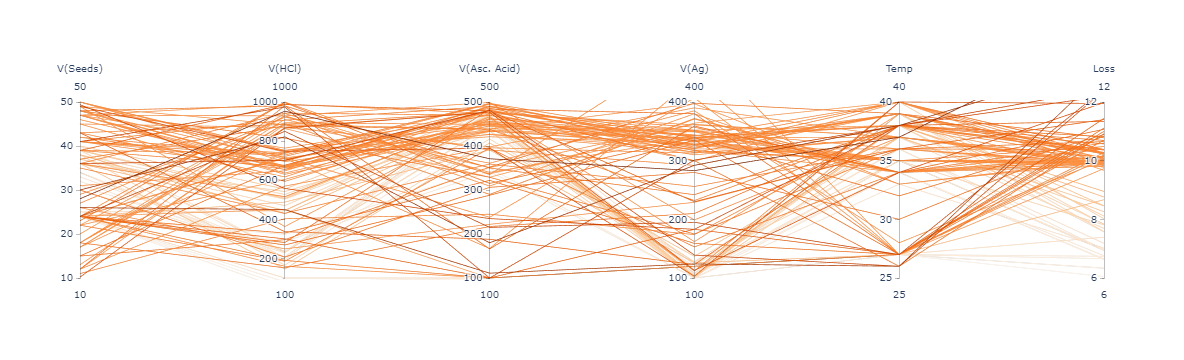

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line=dict(color=d['loss'], 
                  colorscale = px.colors.sequential.Oranges),
        dimensions = list([
            dict(range = [10,50],
                 label = 'V(Seeds)', values = d['seeds']),
            dict(range = [100,1000],
                label = 'V(HCl)', values = d['hcl']),
            dict(range = [100,500],
                label = 'V(Asc. Acid)', values = d['Asc-acid']),
            dict(range = [100,400],
                label = 'V(Ag)', values = d['silver']),
            dict(range = [25,40],
                label = 'Temp', values = d['temp']),
            dict(range = [6,12],
                label = 'Loss', values = d['loss'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()


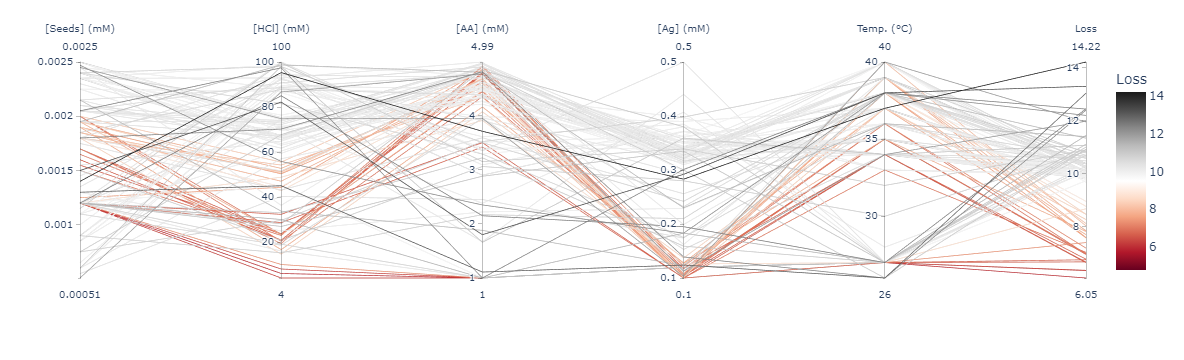

In [19]:
import plotly.express as px
import pandas as pd

# Import data for plotly - with concentration instead of volumes
df_plotly = pd.read_excel('for_plotly.xlsx')

d = df_plotly[['conc(seeds)', 'conc(hcl)', 'conc(aa)', 'conc(ag)', 'temp', 'loss']]

# Define custom labels for dimensions
custom_labels = {
    'conc(seeds)': '[Seeds] (mM)',
    'conc(hcl)': '[HCl] (mM)',
    'conc(aa)': '[AA] (mM)',
    'conc(ag)': '[Ag] (mM)',
    'temp': 'Temp. (°C)',
    'loss': 'Loss'
}

fig = px.parallel_coordinates(
    d,
    color="loss",
    dimensions=['conc(seeds)', 'conc(hcl)', 'conc(aa)', 'conc(ag)', 'temp', 'loss'],
    labels=custom_labels,
    color_continuous_scale='RdGy',
    color_continuous_midpoint=9.5  # Adjust the midpoint as needed
)

fig.show()

#fig.write_image(RESULT_DIR_PATH + 'plotly.pdf', scale = 2)

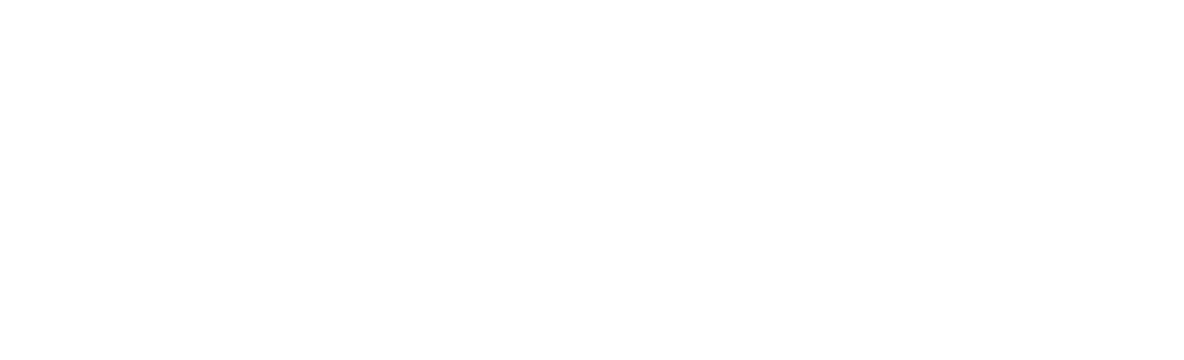

In [21]:
import plotly.express as px
import pandas as pd

# Import data for plotly - with concentration instead of volumes
df_plotly = pd.read_excel('for_plotly.xlsx')

# Define custom labels for dimensions
custom_labels = {
    'conc(seeds)': '[Seeds] (mM)',
    'conc(hcl)': '[HCl] (mM)',
    'conc(aa)': '[AA] (mM)',
    'conc(ag)': '[Ag] (mM)',
    'temp': 'Temp. (°C)',
    'loss': 'Loss'
}

# Define custom ranges for dimensions
custom_ranges = {
    'conc(seeds)': [0.0005, 0.0025],  # Example range for 'Seeds' dimension
    'conc(hcl)': [0, 100],     # Example range for 'HCl' dimension
    'conc(aa)': [0, 0.5],     # Example range for 'AA' dimension
    'conc(ag)': [0, 30],     # Example range for 'Ag' dimension
    'temp': [25, 40],        # Example range for 'Temp' dimension
    'loss': [5, 15]          # Example range for 'Loss' dimension
}

# Filter the data within the custom range for each dimension
for dimension, range_values in custom_ranges.items():
    df_plotly = df_plotly[(df_plotly[dimension] >= range_values[0]) & (df_plotly[dimension] <= range_values[1])]

fig = px.parallel_coordinates(
    df_plotly,
    color="loss",
    dimensions=['conc(seeds)', 'conc(hcl)', 'conc(aa)', 'conc(ag)', 'temp', 'loss'],
    labels=custom_labels,
    color_continuous_scale='RdGy',
    color_continuous_midpoint=9.5  # Adjust the midpoint as needed
)
fig.show()

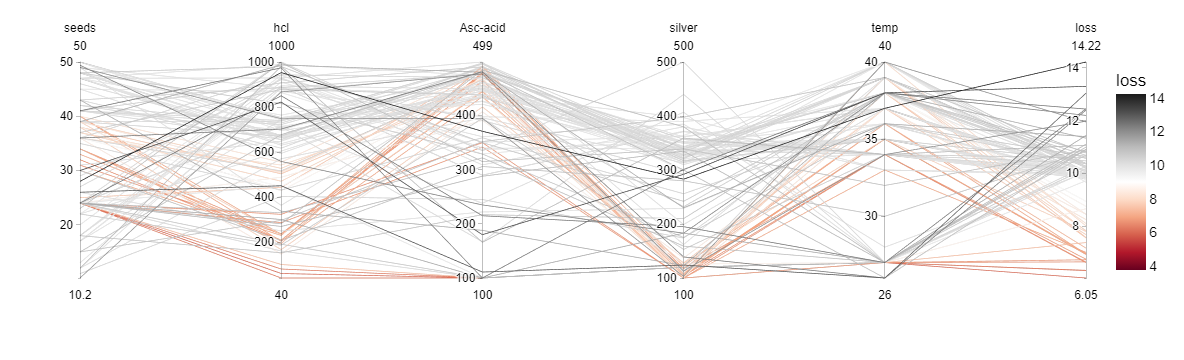

In [48]:
import plotly.express as px
import plotly.graph_objects as go

d = df[['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss']]

fig = px.parallel_coordinates(d, color="loss",
                              dimensions=['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss'],     
                              color_continuous_scale='RdGy',
                              color_continuous_midpoint=9  # Adjust the midpoint as needed)
                             )
# Increase the text size
fig.update_layout(
    font=dict(
        size=14,  # Increase the text size
        family='Arial',
        color='black'
    )
)

fig.show()

# Constants factors
marginInches = 1/18
ppi = 96
width_inches = 5.9
height_inches = 3

fig.write_image(RESULT_DIR_PATH + 'plotly.pdf', width=(width_inches - marginInches)*ppi, height=(height_inches  - marginInches)*ppi)

## Convert the volumes in the parallel coordinate graph into concentrations

In [27]:
df

seeds  hcl  Asc-acid  silver  temp   loss
0     24.0  850       215     195    27  12.45
1     24.0  712       167     440    27  10.19
2     24.0  269       288     335    27  11.11
3     24.0  281       484     380    27  11.00
4     24.0  488       391     126    27   8.67
..     ...  ...       ...     ...   ...    ...
107   24.0   80       100     120    27   6.34
108   24.0  100       100     120    27   7.39
109   24.0  450       100     120    27   9.73
110   24.0  160       100     120    27  10.19
111   24.0  190       100     120    27  10.70

[112 rows x 6 columns]

In [32]:
df_conc = df.copy()
df_conc

df_conc['seeds'] = (df_conc['seeds']*0.5)/10000
df_conc['hcl'] = (df_conc['hcl']*1000)/10000
df_conc['Asc-acid'] = (df_conc['Asc-acid']*100)/10000
df_conc['silver'] = (df_conc['silver']*10)/10000

df_conc

seeds   hcl  Asc-acid  silver  temp   loss
0    0.0012  85.0      2.15   0.195    27  12.45
1    0.0012  71.2      1.67   0.440    27  10.19
2    0.0012  26.9      2.88   0.335    27  11.11
3    0.0012  28.1      4.84   0.380    27  11.00
4    0.0012  48.8      3.91   0.126    27   8.67
..      ...   ...       ...     ...   ...    ...
107  0.0012   8.0      1.00   0.120    27   6.34
108  0.0012  10.0      1.00   0.120    27   7.39
109  0.0012  45.0      1.00   0.120    27   9.73
110  0.0012  16.0      1.00   0.120    27  10.19
111  0.0012  19.0      1.00   0.120    27  10.70

[112 rows x 6 columns]

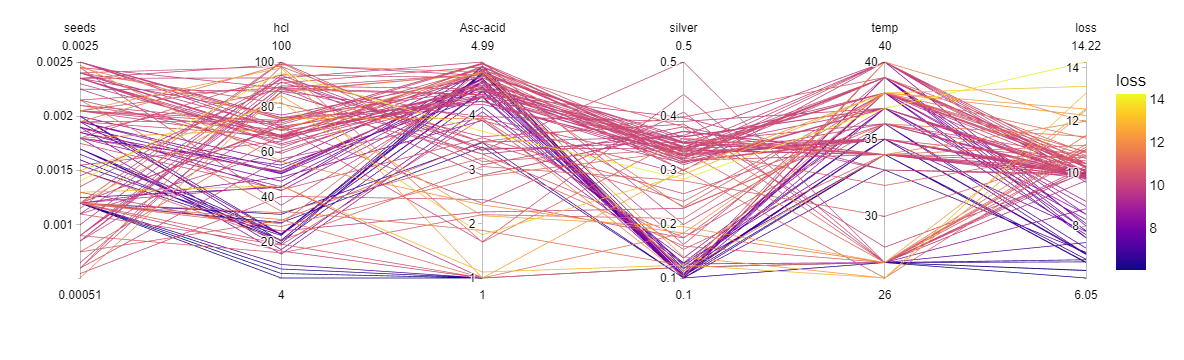

In [33]:
import plotly.express as px
import plotly.graph_objects as go

d = df_conc[['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss']]

fig = px.parallel_coordinates(d, color="loss",
                              dimensions=['seeds', 'hcl', 'Asc-acid', 'silver', 'temp', 'loss'])

# Increase the text size
fig.update_layout(
    font=dict(
        size=14,  # Increase the text size
        family='Arial',
        color='black'
    )
)

fig.show()

# Constants factors
marginInches = 1/18
ppi = 96
width_inches = 5.9
height_inches = 3

fig.write_image(RESULT_DIR_PATH + 'plotly_conc.pdf', width=(width_inches - marginInches)*ppi, height=(height_inches  - marginInches)*ppi)

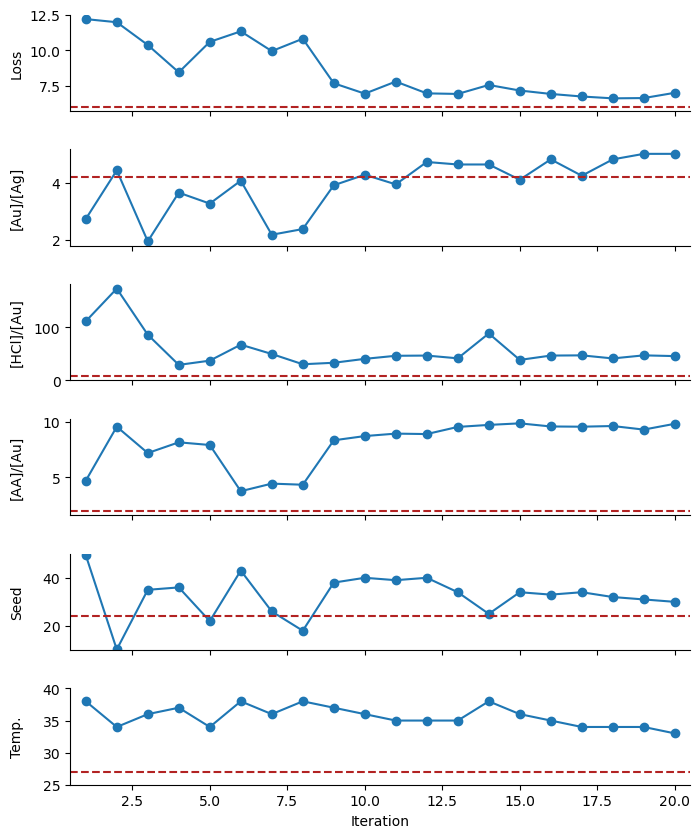

In [8]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(DATA_UV_DIR_PATH+'iterations.csv')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(8, 10))

# Plot the first column against the second column in the first subplot
axs[0].plot(df.iloc[:, 0], df.iloc[:, 6])
axs[0].scatter(df.iloc[:, 0], df.iloc[:, 6])
axs[0].set_ylabel('Loss')
axs[0].axhline(y = 6.05, color = 'firebrick', linestyle = '--')
axs[0].spines[['right','top']].set_visible(False)

# Plot the first column against the third column in the second subplot
axs[1].plot(df.iloc[:, 0], df.iloc[:, 7])
axs[1].scatter(df.iloc[:, 0], df.iloc[:, 7])
axs[1].set_ylabel('[Au]/[Ag]')
axs[1].axhline(y = 4.2, color = 'firebrick', linestyle = '--')
axs[1].spines[['right','top']].set_visible(False)

# Plot the first column against the fourth column in the third subplot
axs[2].plot(df.iloc[:, 0], df.iloc[:, 8])
axs[2].scatter(df.iloc[:, 0], df.iloc[:, 8])
axs[2].set_ylabel('[HCl]/[Au]')
axs[2].axhline(y = 8, color = 'firebrick', linestyle = '--')
axs[2].spines[['right','top']].set_visible(False)

# Plot the first column against the fourth column in the fourth subplot
axs[3].plot(df.iloc[:, 0], df.iloc[:, 9])
axs[3].scatter(df.iloc[:, 0], df.iloc[:, 9])
axs[3].set_ylabel('[AA]/[Au]')
axs[3].axhline(y = 2, color = 'firebrick', linestyle = '--')
axs[3].spines[['right','top']].set_visible(False)

# Plot the first column against the fifth column in the fourth subplot
axs[4].plot(df.iloc[:, 0], df.iloc[:, 1])
axs[4].scatter(df.iloc[:, 0], df.iloc[:, 1])
axs[4].set_ylabel('Seed')
axs[4].set_ylim(10,50)
axs[4].axhline(y = 24, color = 'firebrick', linestyle = '--')
axs[4].spines[['right','top']].set_visible(False)

# Plot the first column against the sixth column in the fourth subplot
axs[5].plot(df.iloc[:, 0], df.iloc[:, 5])
axs[5].scatter(df.iloc[:, 0], df.iloc[:, 5])
axs[5].set_ylabel('Temp.')
axs[5].axhline(y = 27, color = 'firebrick', linestyle = '--')
axs[5].set_xlabel('Iteration')
axs[5].set_xlim(0.5,20.5)
axs[5].set_ylim(25,40)
axs[5].spines[['right','top']].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
fig.align_ylabels()

# Show the plot
plt.show()

In [9]:
df

Iteration #  Au seeds [Anish]  HCl (uL) [Anish]  \
0             1              49.4               558   
1             2              10.2               867   
2             3              35.0               431   
3             4              36.0               146   
4             5              22.0               186   
5             6              43.0               337   
6             7              26.0               249   
7             8              18.0               152   
8             9              38.0               166   
9            10              40.0               203   
10           11              39.0               232   
11           12              40.0               234   
12           13              34.0               208   
13           14              25.0               443   
14           15              34.0               193   
15           16              33.0               234   
16           17              34.0               236   
17           18              32.0               207   
18           19              31.0               236   
19           20              30.0               229   

    ascorbic acid (uL) [Anish]  silver (uL) [Anish]  temperature [Anish]  \
0                          235                  183                   38   
1                          477                  113                   34   
2                          359                  256                   36   
3                          407                  137                   37   
4                          395                  153                   34   
5                          188                  123                   38   
6                          222                  229                   36   
7                          217                  210                   38   
8                          416                  128                   37   
9                          435                  117                   36   
10                         446                  127                   35   
11                         444                  106                   35   
12                         476                  108                   35   
13                         485                  108                   38   
14                         492                  122                   36   
15                         478                  104                   35   
16                         477                  118                   34   
17                         480                  104                   34   
18                         464                  100                   34   
19                         490                  100                   33   

    loss parameter  [aucl]/[ag]  [hcl]/[aucl]  [aa]/[aucl]  conc(seed)  \
0            12.20     2.732240         111.6         4.70     0.00247   
1            11.98     4.424779         173.4         9.54     0.00051   
2            10.38     1.953125          86.2         7.18     0.00175   
3             8.46     3.649635          29.2         8.14     0.00180   
4            10.60     3.267974          37.2         7.90     0.00110   
5            11.34     4.065041          67.4         3.76     0.00215   
6             9.95     2.183406          49.8         4.44     0.00130   
7            10.82     2.380952          30.4         4.34     0.00090   
8             7.69     3.906250          33.2         8.32     0.00190   
9             6.96     4.273504          40.6         8.70     0.00200   
10            7.81     3.937008          46.4         8.92     0.00195   
11            6.98     4.716981          46.8         8.88     0.00200   
12            6.94     4.629630          41.6         9.52     0.00170   
13            7.57     4.629630          88.6         9.70     0.00125   
14            7.18     4.098361          38.6         9.84     0.00170   
15            6.94     4.807692          46.8         9.56     0.00

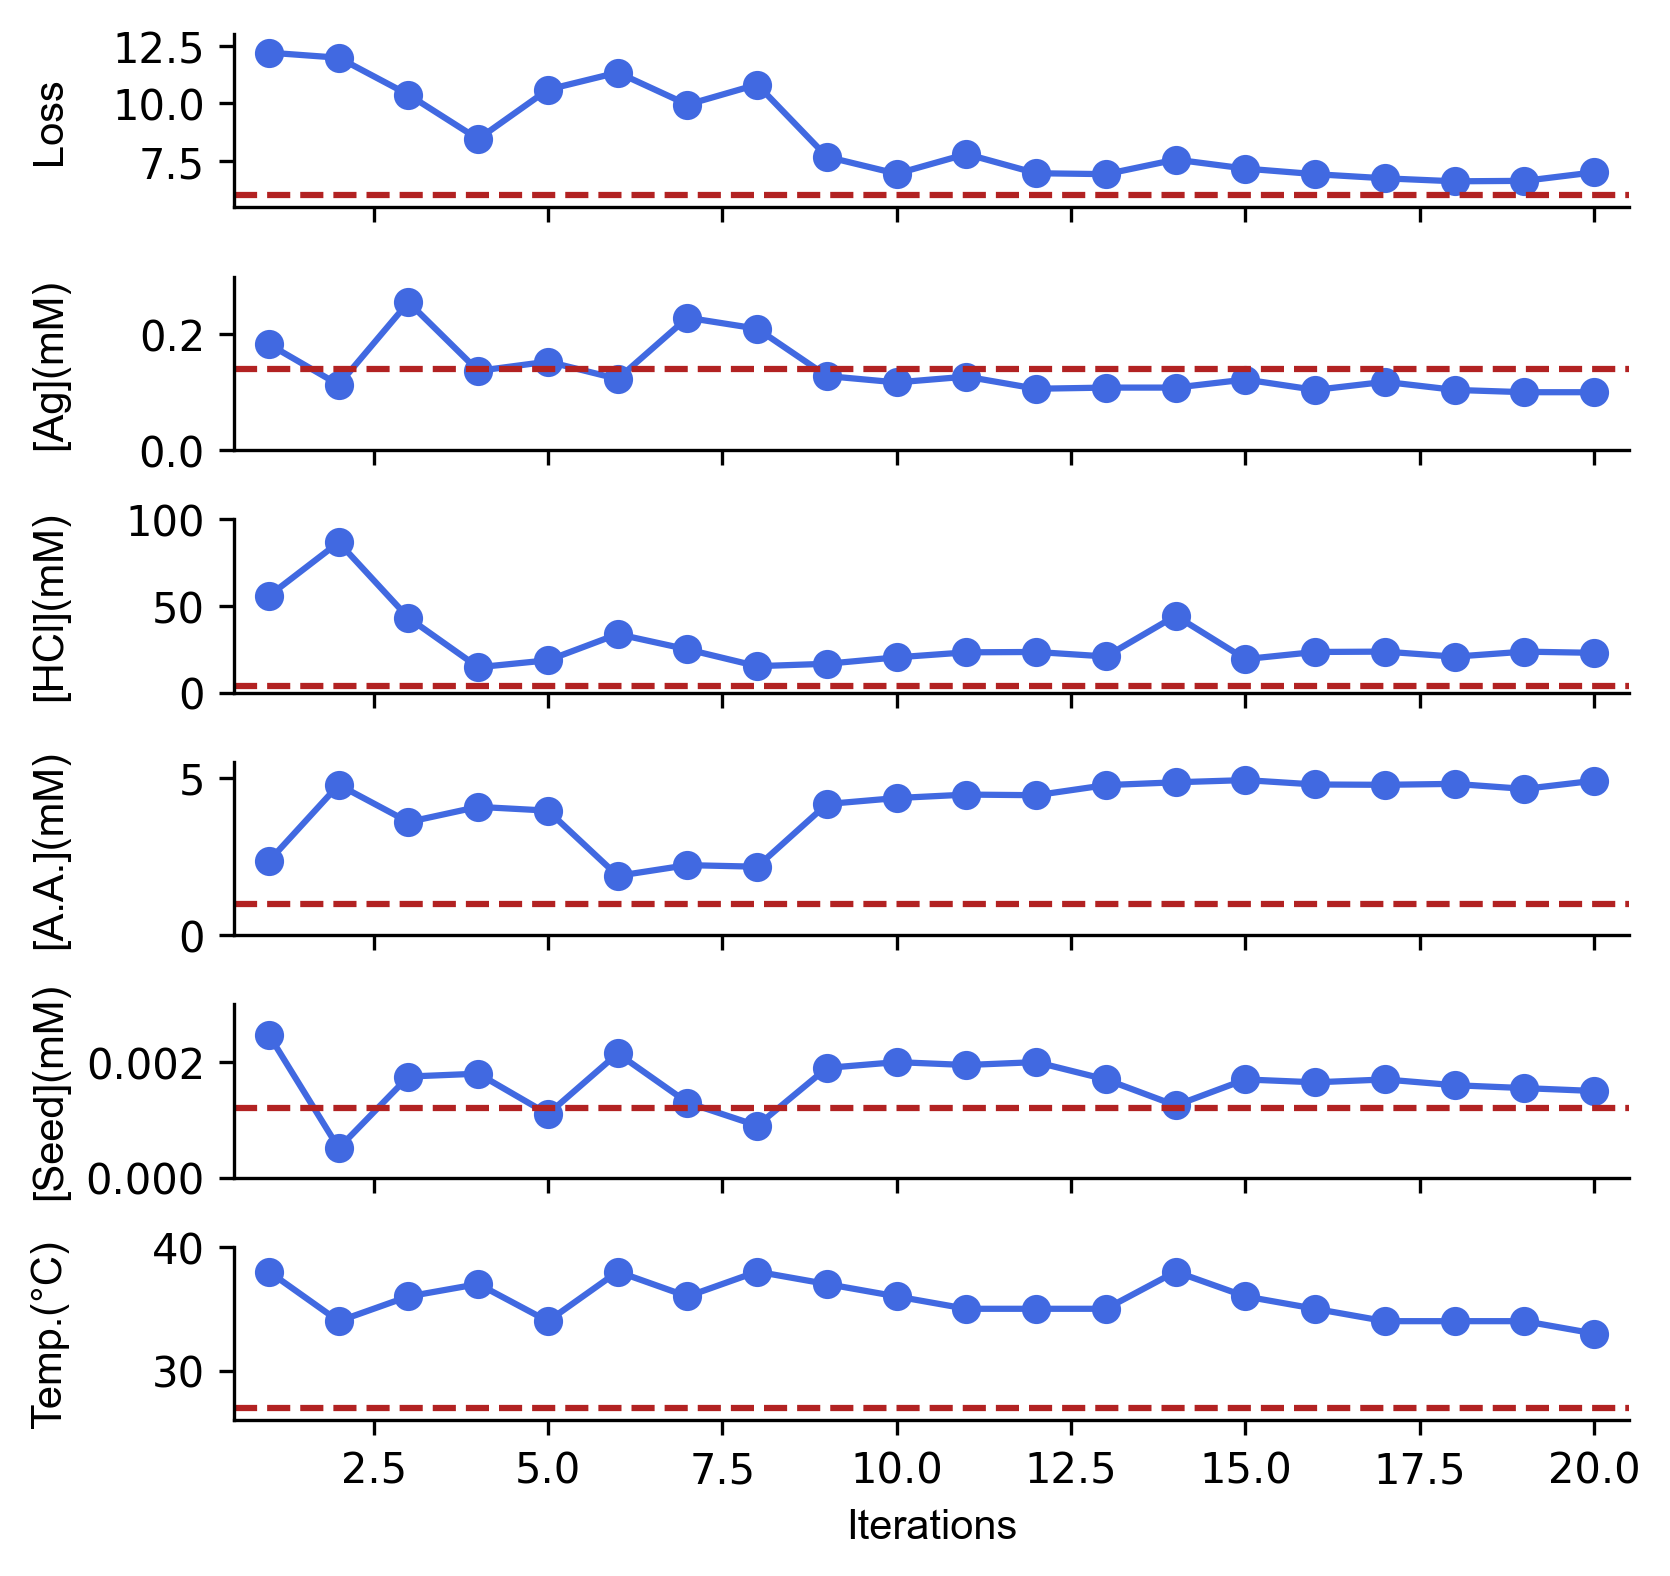

In [5]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(DATA_UV_DIR_PATH+'iterations.csv')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(6, 6), dpi = 300)

# Plot the first column against the second column in the first subplot
axs[0].plot(df['Iteration #'], df['loss parameter'], color = 'royalblue')
axs[0].scatter(df['Iteration #'], df['loss parameter'], color = 'royalblue')
axs[0].set_ylabel('Loss',  fontsize='medium', font='Arial')
axs[0].set_ylim(5.5,13)
axs[0].axhline(y = 6.05, color = 'firebrick', linestyle = '--')
axs[0].spines[['right','top']].set_visible(False)

# Plot the first column against the third column in the second subplot
axs[1].plot(df['Iteration #'], df['conc(ag)'], color = 'royalblue')
axs[1].scatter(df['Iteration #'], df['conc(ag)'], color = 'royalblue')
axs[1].set_ylabel('[Ag](mM)',  fontsize='medium', font='Arial')
axs[1].set_ylim(0,0.3)
axs[1].axhline(y = 0.14, color = 'firebrick', linestyle = '--')
axs[1].spines[['right','top']].set_visible(False)

# Plot the first column against the fourth column in the third subplot
axs[2].plot(df['Iteration #'], df['conc(hcl)'], color = 'royalblue')
axs[2].scatter(df['Iteration #'], df['conc(hcl)'], color = 'royalblue')
axs[2].set_ylabel('[HCl](mM)',  fontsize='medium', font='Arial')
axs[2].set_ylim(0,100)
axs[2].axhline(y = 4, color = 'firebrick', linestyle = '--')
axs[2].spines[['right','top']].set_visible(False)

# Plot the first column against the fourth column in the fourth subplot
axs[3].plot(df['Iteration #'], df['conc(aa)'], color = 'royalblue')
axs[3].scatter(df['Iteration #'], df['conc(aa)'], color = 'royalblue')
axs[3].set_ylabel('[A.A.](mM)',  fontsize='medium', font='Arial')
axs[3].set_ylim(0,5.5)
axs[3].axhline(y = 1, color = 'firebrick', linestyle = '--')
axs[3].spines[['right','top']].set_visible(False)

# Plot the first column against the fifth column in the fourth subplot
axs[4].plot(df['Iteration #'], df['conc(seed)'], color = 'royalblue')
axs[4].scatter(df['Iteration #'], df['conc(seed)'], color = 'royalblue')
axs[4].set_ylabel('[Seed](mM)',  fontsize='medium', font='Arial')
axs[4].set_ylim(0,0.003)
axs[4].axhline(y = 0.0012, color = 'firebrick', linestyle = '--')
axs[4].spines[['right','top']].set_visible(False)

# Plot the first column against the sixth column in the fourth subplot
axs[5].plot(df['Iteration #'], df['temperature [Anish]'], color = 'royalblue')
axs[5].scatter(df['Iteration #'], df['temperature [Anish]'], color = 'royalblue')
axs[5].set_ylabel(u'Temp.(\u00B0C)',  fontsize='medium', font='Arial')
axs[5].axhline(y = 27, color = 'firebrick', linestyle = '--')
axs[5].set_xlabel('Iterations',  fontsize='medium', font='Arial')
axs[5].set_xlim(0.5,20.5)
axs[5].set_ylim(26,40)
axs[5].spines[['right','top']].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
fig.align_ylabels()

# Show the plot
plt.show()

fig.savefig(RESULT_DIR_PATH+'exp1_iterations.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

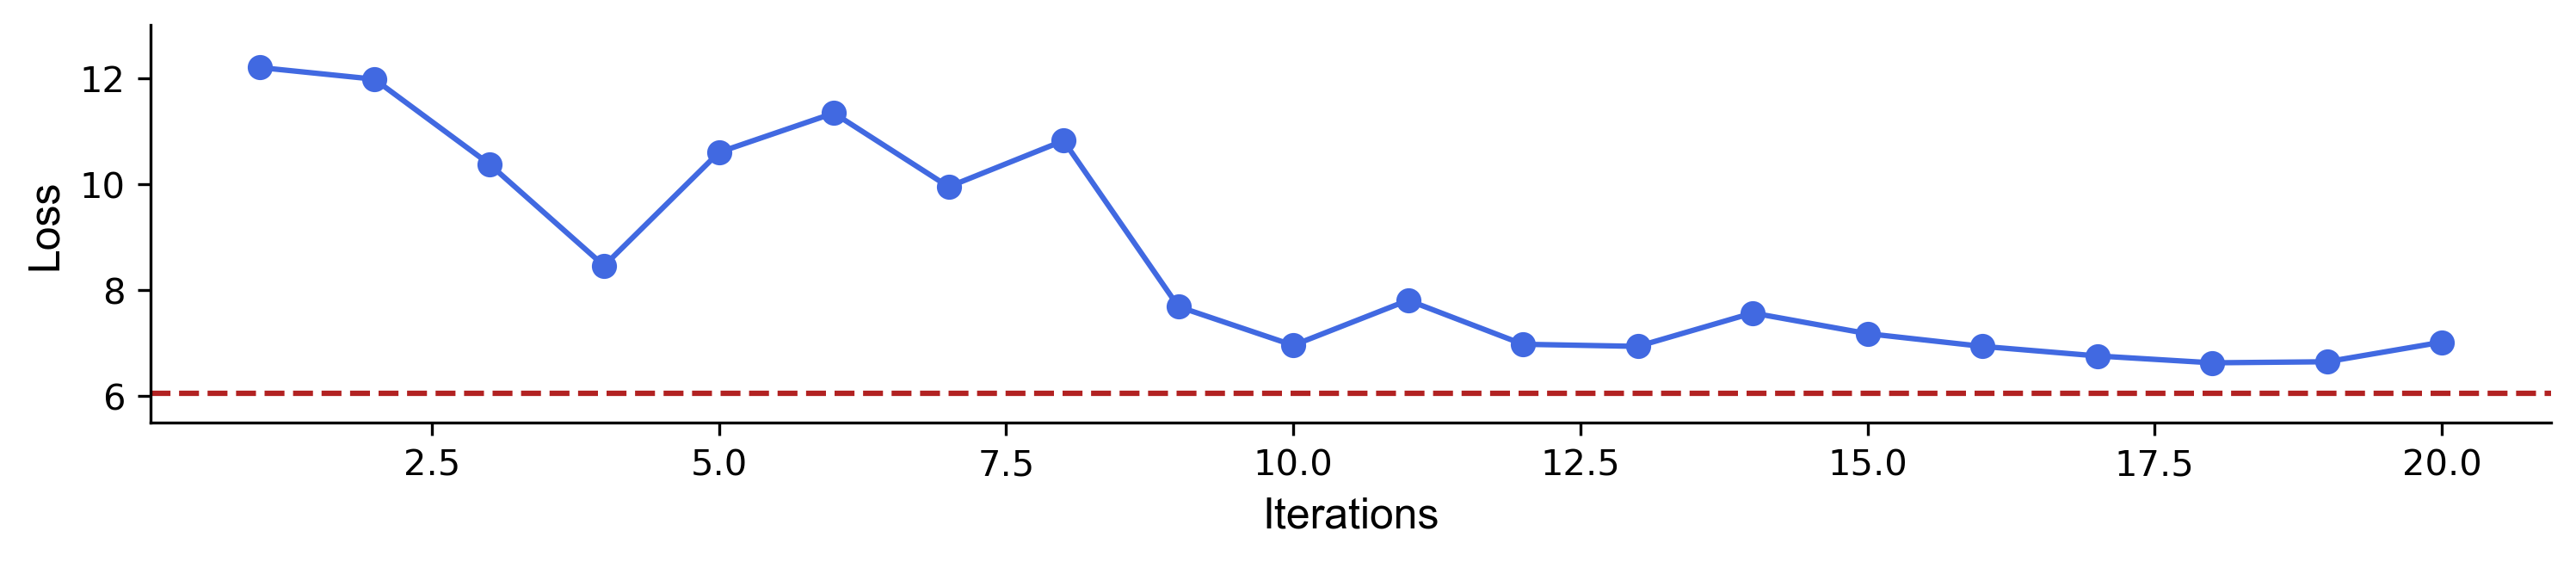

In [24]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(DATA_UV_DIR_PATH+'iterations.csv')

fig, ax = plt.subplots(figsize=(12, 2), dpi=300)

# Plot the first column against the second column
ax.plot(df['Iteration #'], df['loss parameter'], color='royalblue', label='Loss')
ax.scatter(df['Iteration #'], df['loss parameter'], color='royalblue')
ax.set_ylabel('Loss', fontsize='large', fontname='Arial')
ax.set_ylim(5.5, 13)
ax.axhline(y=6.05, color='firebrick', linestyle='--', label='Threshold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Iterations', fontsize='large', fontname='Arial')

# Show the plot
plt.show()

fig.savefig(RESULT_DIR_PATH+'exp1_loss.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

# Plotting volumes explored in the reactions

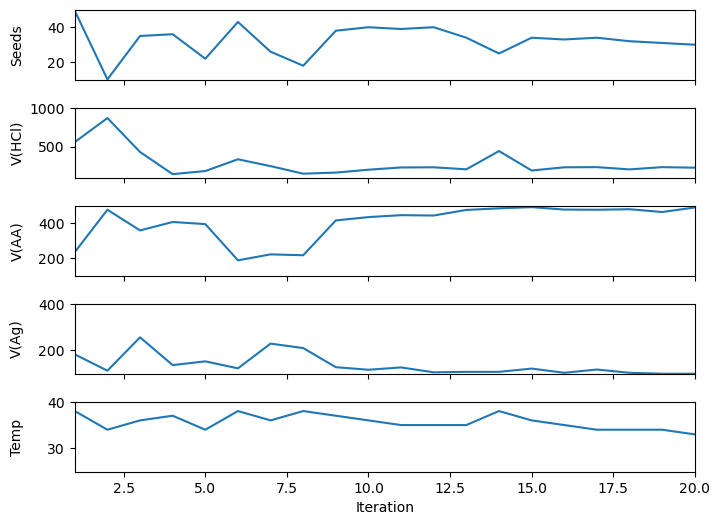

In [11]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(DATA_UV_DIR_PATH+'iterations.csv')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=5, sharex=True, figsize=(8, 6))

# Plot the first column against the second column in the first subplot
axs[0].plot(df.iloc[:, 0], df.iloc[:, 1])
axs[0].set_ylabel('Seeds')
axs[0].set_ylim(10,50)

# Plot the first column against the third column in the second subplot
axs[1].plot(df.iloc[:, 0], df.iloc[:, 2])
axs[1].set_ylabel('V(HCl)')
axs[1].set_ylim(100,1000)

# Plot the first column against the fourth column in the third subplot
axs[2].plot(df.iloc[:, 0], df.iloc[:, 3])
axs[2].set_ylabel('V(AA)')
axs[2].set_ylim(100,500)

# Plot the first column against the fourth column in the fourth subplot
axs[3].plot(df.iloc[:, 0], df.iloc[:, 4])
axs[3].set_ylabel('V(Ag)')
axs[3].set_ylim(100,400)

# Plot the first column against the fifth column in the fourth subplot
axs[4].plot(df.iloc[:, 0], df.iloc[:, 5])
axs[4].set_ylabel('Temp')
axs[4].set_ylim(25,40)
axs[4].set_xlim(1,20)
axs[4].set_xlabel('Iteration')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
fig.align_ylabels()

# Show the plot
plt.show()

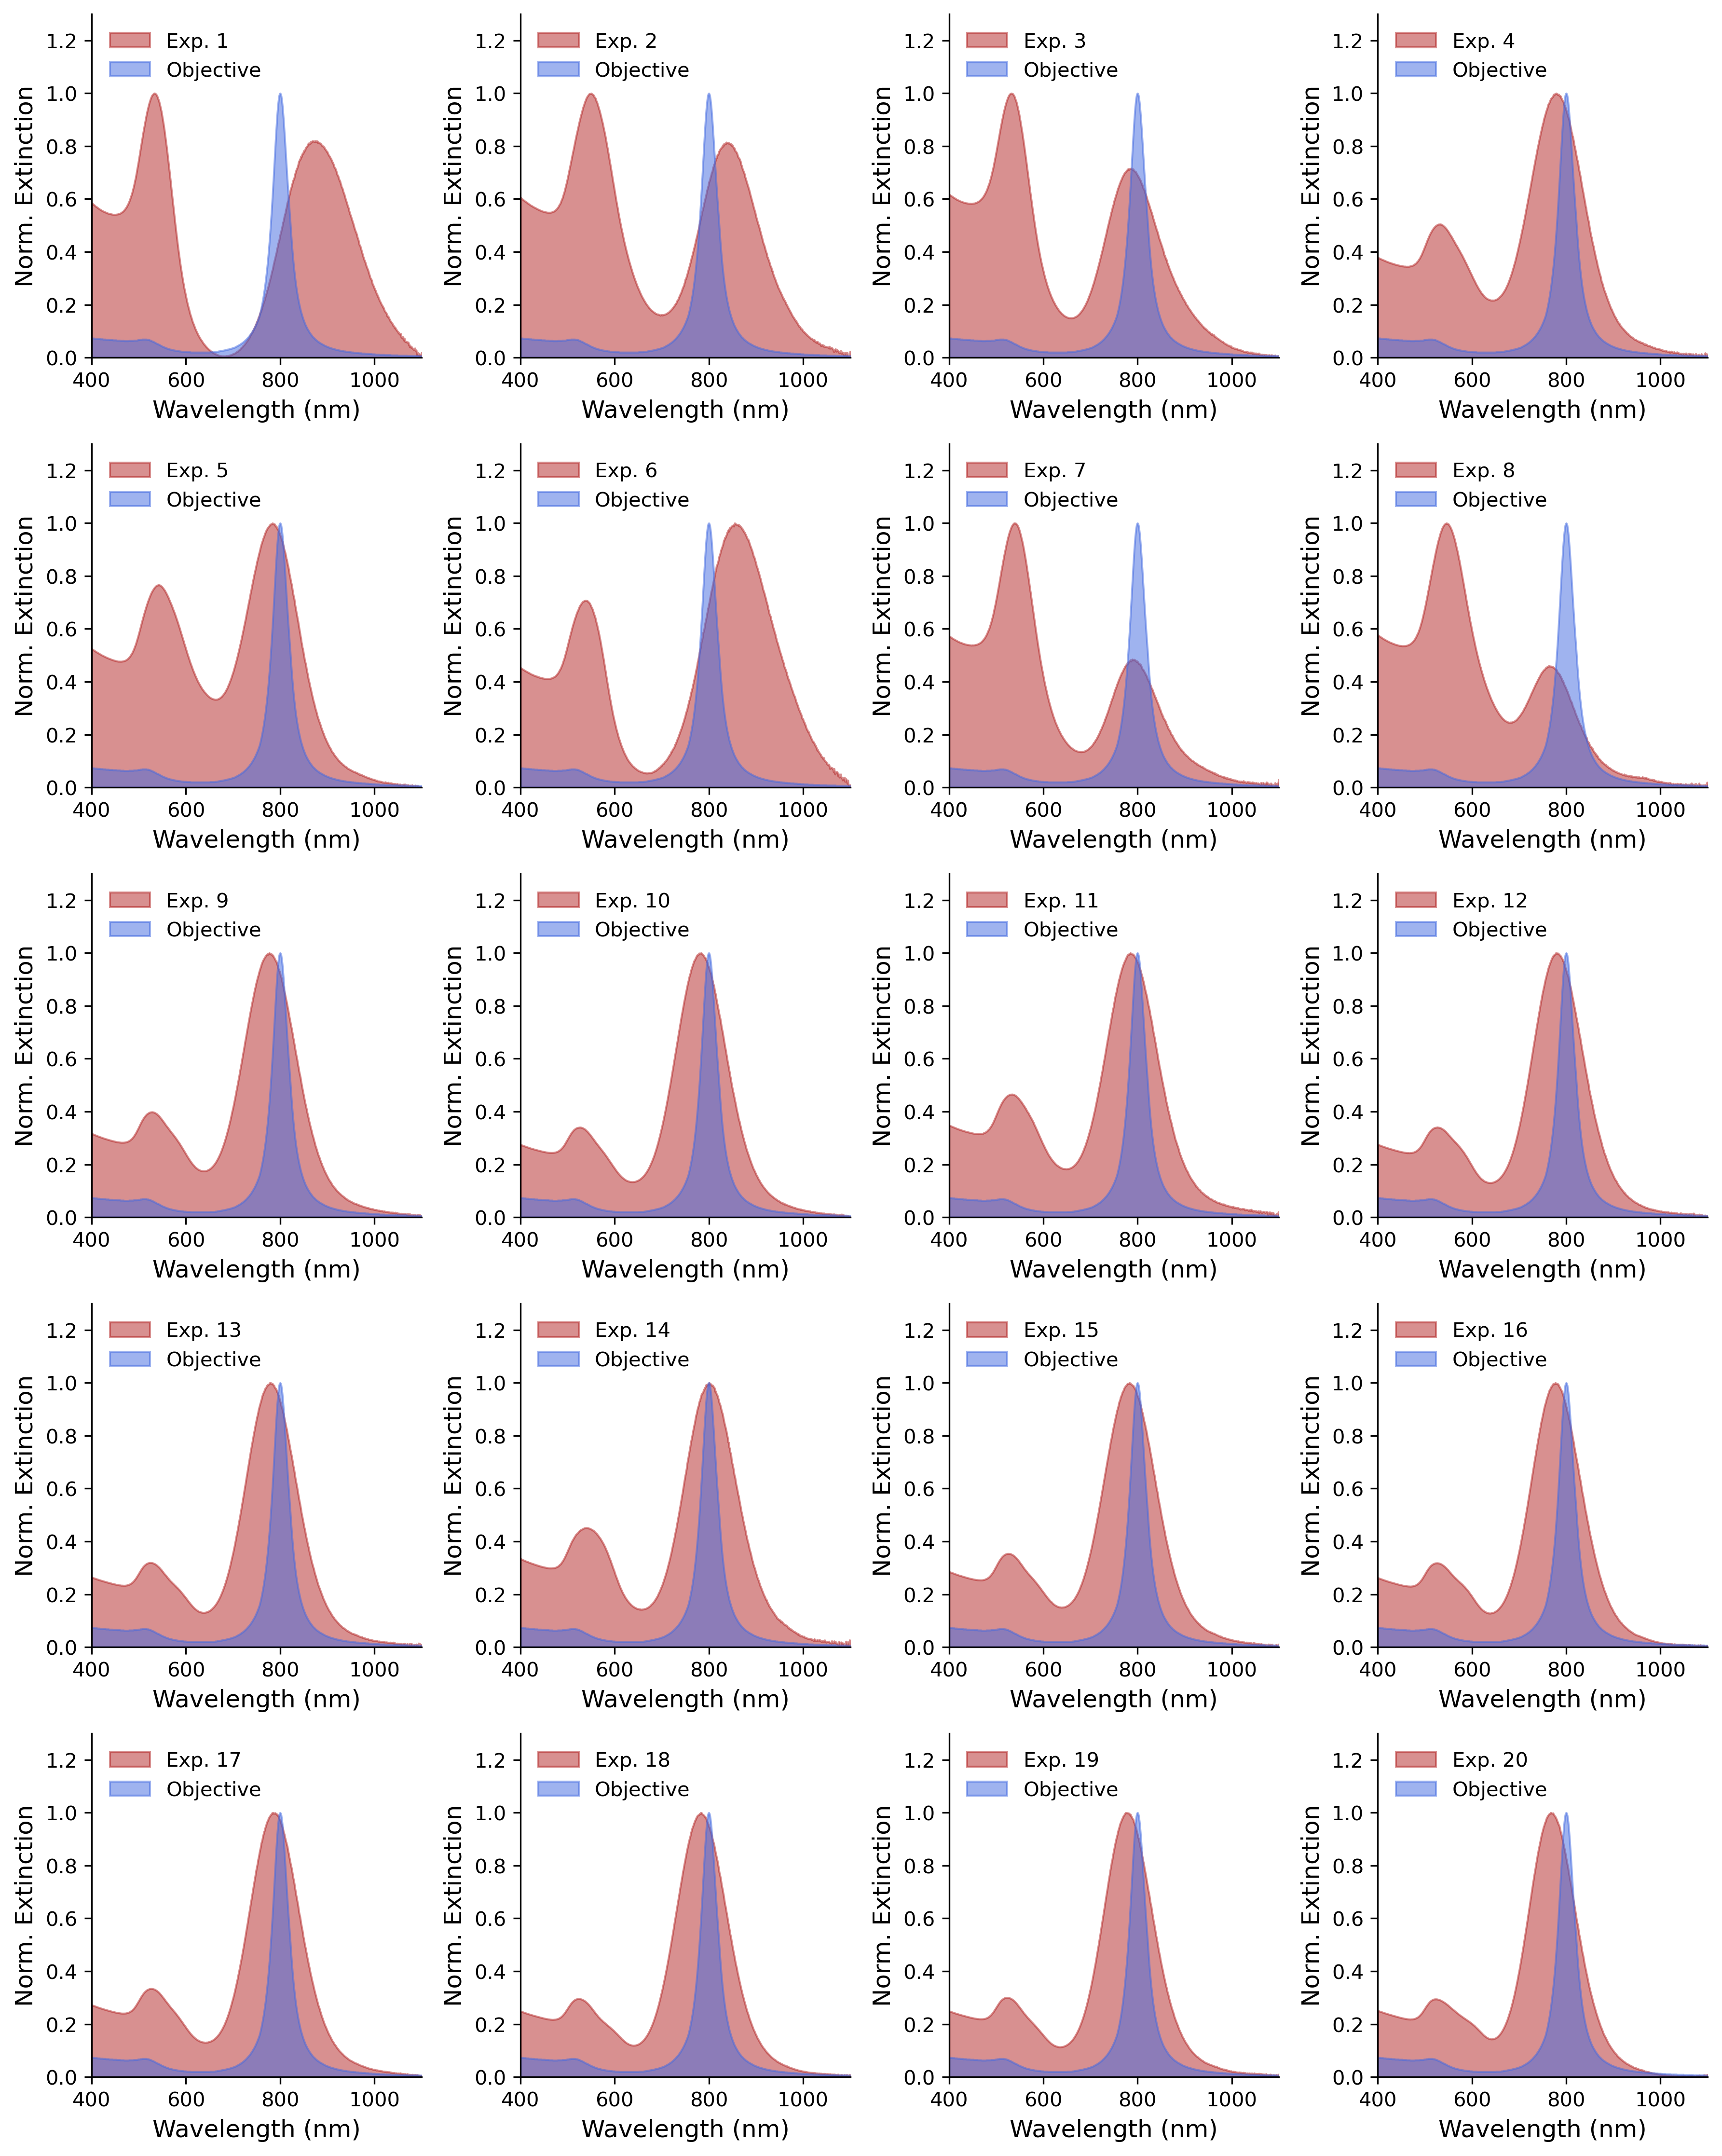

In [27]:
'''
Import example data from UV-Vis-NIR folder
'''

#================ import data =========================#

# Load reference CSV file
ref_df = pd.read_csv(os.path.join(DATA_UV_DIR_PATH_ABS+'rev-obj.csv'), header=None)

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH_ABS

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Define the reference CSV file name
ref_file_name = 'rev-obj.csv'

# Read the reference CSV file into a Pandas DataFrame
ref_df = pd.read_csv(os.path.join(folder_path, ref_file_name), header=None)

# Create a figure with 5 rows and 4 columns of subplots, 12 inches long and  inches wide, 300 dpi
fig, axs = plt.subplots(5, 4, figsize=(12, 15), dpi=300)

# Initialize variables to keep track of subplot indices
row_index = 0
col_index = 0

# Initialize empty list to store Abs at lambda max. / Abs at 400nm
abs_ratios = []
num = 1

# Loop through all CSV files in the folder
for csv_file in natsorted(csv_files):
    
    # Check if the current file is not the reference file
    if os.path.basename(csv_file) != ref_file_name:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, header=None)

        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())
        
        # Plot the normalized second column of the current file against the reference file in the current subplot
        axs[row_index, col_index].fill_between(df.iloc[:, 0], 0, df.iloc[:, 1], color='firebrick', label='Exp. '+str(num), alpha=0.5)
        axs[row_index, col_index].fill_between(ref_df[0], ref_df[1], 0, color = 'royalblue', label='Objective', alpha = 0.5)
        num = num+1
        axs[row_index, col_index].set_xlabel(r'Wavelength (nm)', fontsize='large')
        axs[row_index, col_index].set_ylabel(r'Norm. Extinction', fontsize='large')
        axs[row_index, col_index].legend(loc = 'upper left', frameon=False, fontsize='medium')
        axs[row_index, col_index].set_xlim(400,1100)
        axs[row_index, col_index].set_ylim([0,1.3])
        axs[row_index, col_index].spines[['right', 'top']].set_visible(False)

        fig.tight_layout()

        # Increment the column index
        col_index += 1

        # If the column index is equal to 5, reset it to 0 and increment the row index
        if col_index == 4:
            col_index = 0
            row_index += 1

plt.show()

# saving the figure
#fig.savefig(RESULT_DIR_PATH+'opt_1_iteration_plot.pdf')

In [24]:
len(natsorted(csv_files))

21

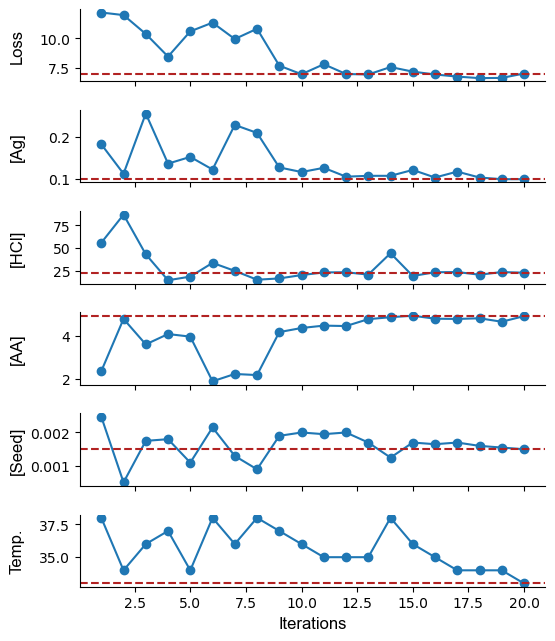

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(DATA_UV_DIR_PATH + 'iterations.csv')

# Create a figure with six subplots
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(6, 7.5))

# Define the labels, target values, and plot colors
labels = ['Loss', '[Ag]', '[HCl]', '[AA]', '[Seed]', 'Temp.']
targets = ['loss parameter', 'conc(ag)', 'conc(hcl)', 'conc(aa)', 'conc(seed)', 'temperature [Anish]']
colors = ['firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick', 'firebrick']

# Set common x-axis label
axs[-1].set_xlabel('Iterations', fontsize='large', fontname='Arial')

# Loop through subplots and plot data
for i, target in enumerate(targets):
    # Plot the data
    axs[i].plot(df['Iteration #'], df[target], label=labels[i])
    axs[i].scatter(df['Iteration #'], df[target])
    
    # Set the y-axis label, font size, and font style
    axs[i].set_ylabel(labels[i], fontsize='large', fontname='Arial')
    
    # Add a horizontal dashed line
    axs[i].axhline(y=df[target].iloc[-1], color=colors[i], linestyle='--')
    
    # Remove top and right spines
    axs[i].spines[['right', 'top']].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
fig.align_ylabels()

# Show the plot
plt.show()


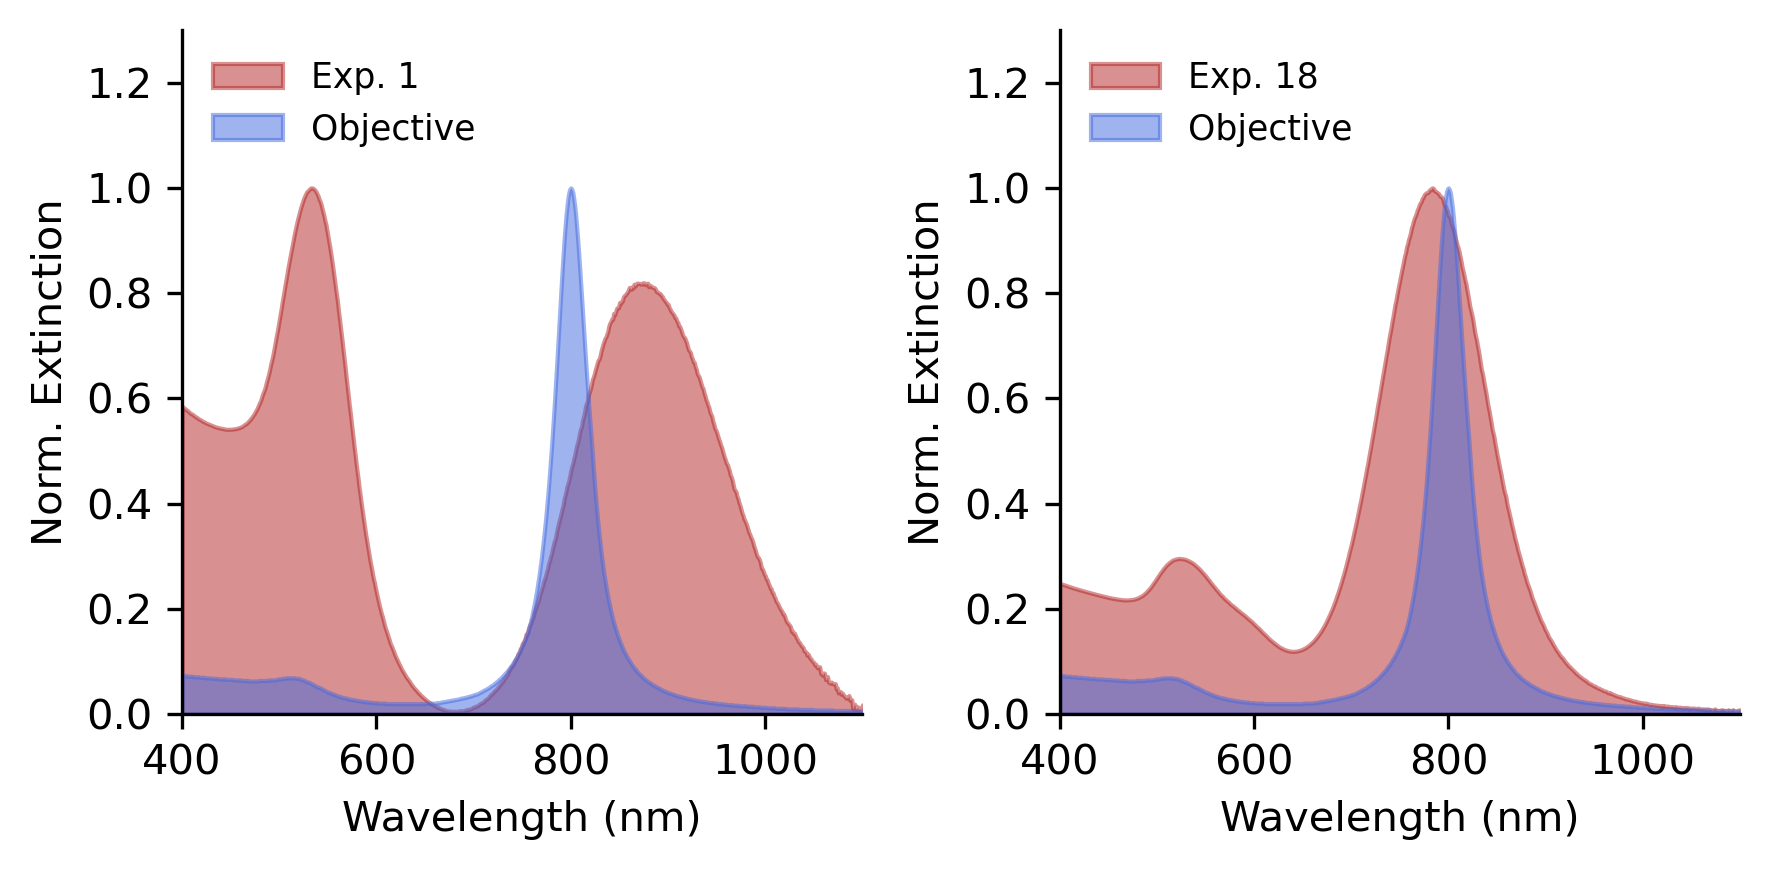

In [125]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import glob
import os

# Load reference CSV file
ref_df = pd.read_csv(os.path.join(DATA_UV_DIR_PATH_ABS, 'rev-obj.csv'), header=None)

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH_ABS

# Get a list of all CSV files in the folder
csv_files = natsorted(glob.glob(os.path.join(folder_path, '*.csv')))

# Define the reference CSV file name
ref_file_name = 'rev-obj.csv'

# Create a figure with 1 row and 2 columns of subplots, 12 inches long and 7.5 inches wide, 300 dpi
fig, axs = plt.subplots(1, 2, figsize=(6, 3), dpi=300)

# Initialize variables to keep track of subplot indices
col_index = 0

# Initialize empty list to store Abs at lambda max. / Abs at 400nm
abs_ratios = []
num = 1

# Define the experiment numbers you want to plot
experiments_to_plot = [1, 18]

# Loop through all CSV files in the folder
for csv_file in csv_files:
    
    # Check if the current file is not the reference file and the experiment number is in the list to plot
    if os.path.basename(csv_file) != ref_file_name and num in experiments_to_plot:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, header=None)

        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())
        
        # Plot the normalized second column of the current file against the reference file in the current subplot
        axs[col_index].fill_between(df.iloc[:, 0], 0, df.iloc[:, 1], color='firebrick', label='Exp. '+str(num), alpha=0.5)
        axs[col_index].fill_between(ref_df[0], ref_df[1], 0, color='royalblue', label='Objective', alpha=0.5)
        
        axs[col_index].set_xlabel(r'Wavelength (nm)', fontsize='medium')
        axs[col_index].set_ylabel(r'Norm. Extinction', fontsize='medium')
        axs[col_index].legend(loc='upper left', frameon=False, fontsize='small')
        axs[col_index].set_xlim(400, 1100)
        axs[col_index].set_ylim([0, 1.3])
        axs[col_index].spines[['right', 'top']].set_visible(False)

        fig.tight_layout()

        # Increment the column index
        col_index += 1

        # Break the loop when both experiments are plotted
        if col_index == 2:
            break

    # Increment the experiment number
    num += 1

plt.show()

fig.savefig(RESULT_DIR_PATH+'exp1_exp8.pdf', transparent=True)


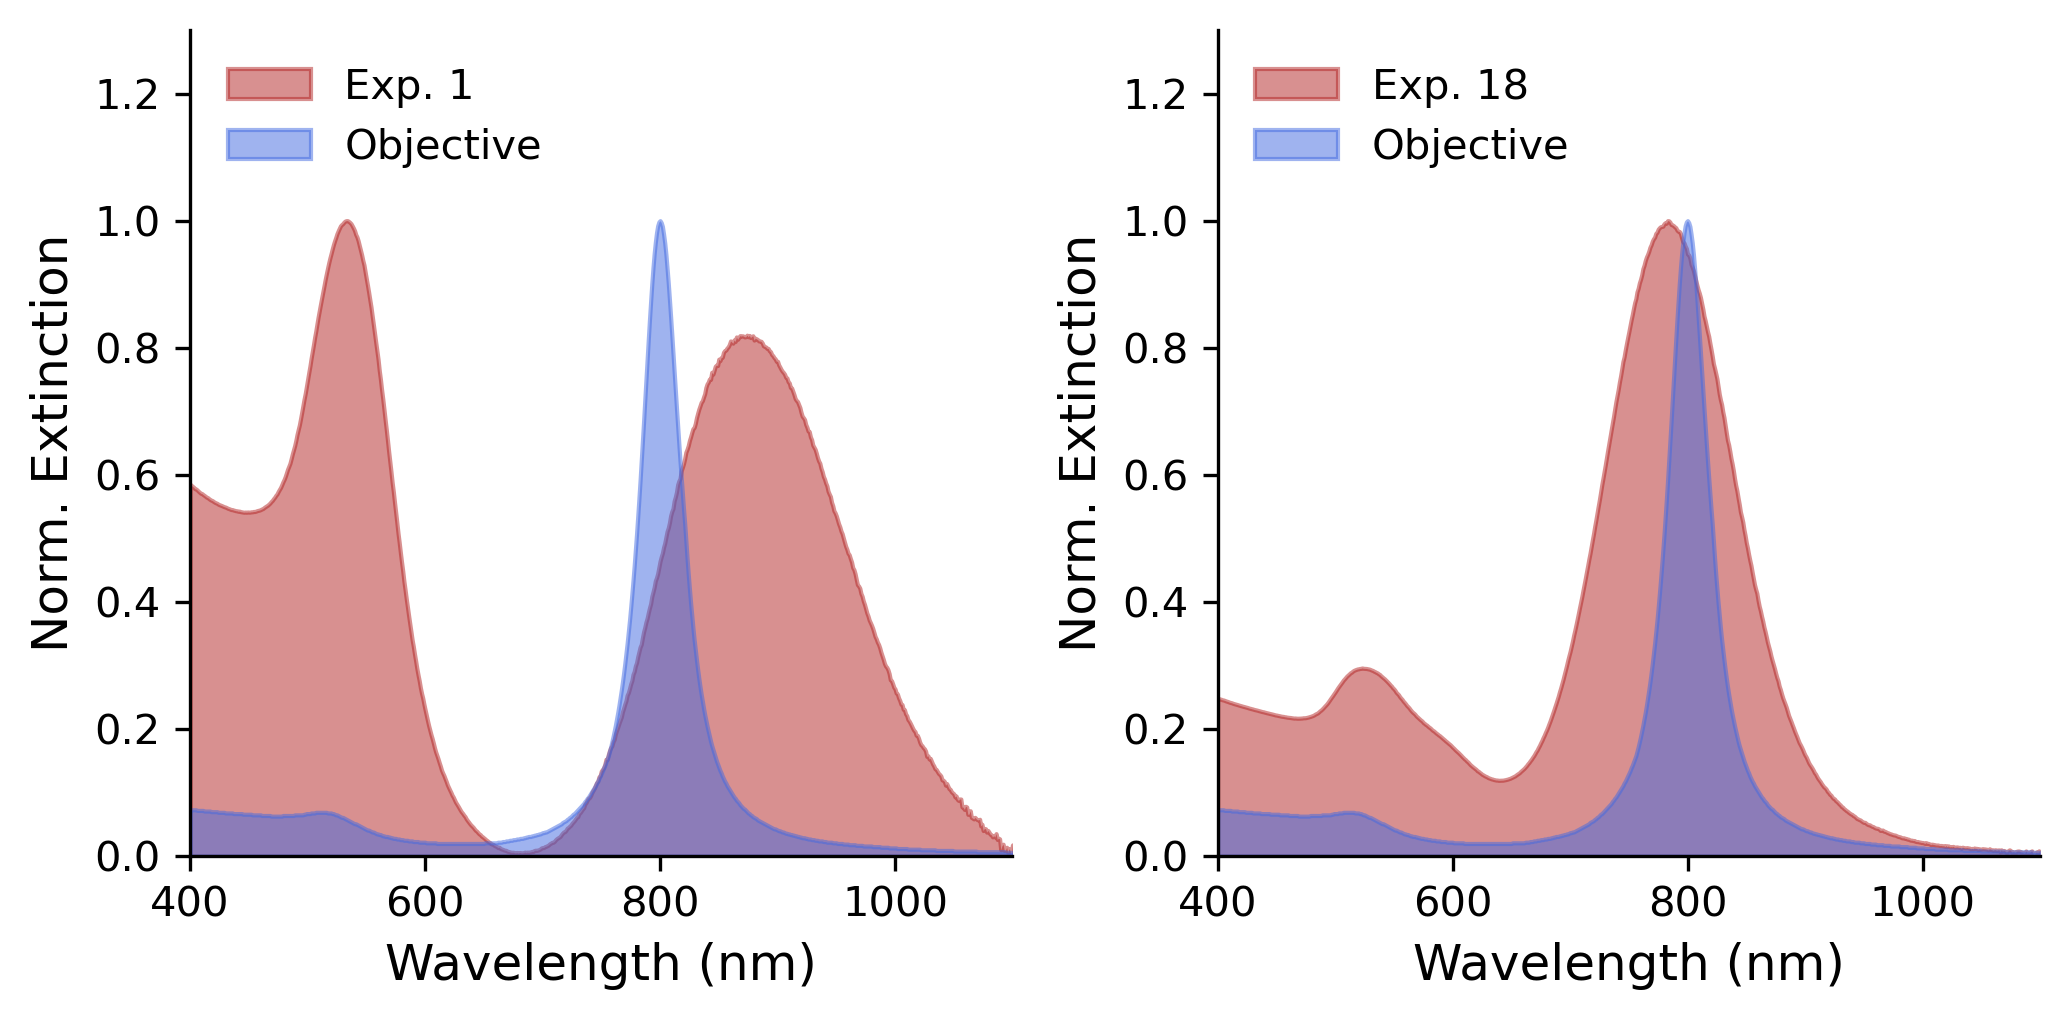

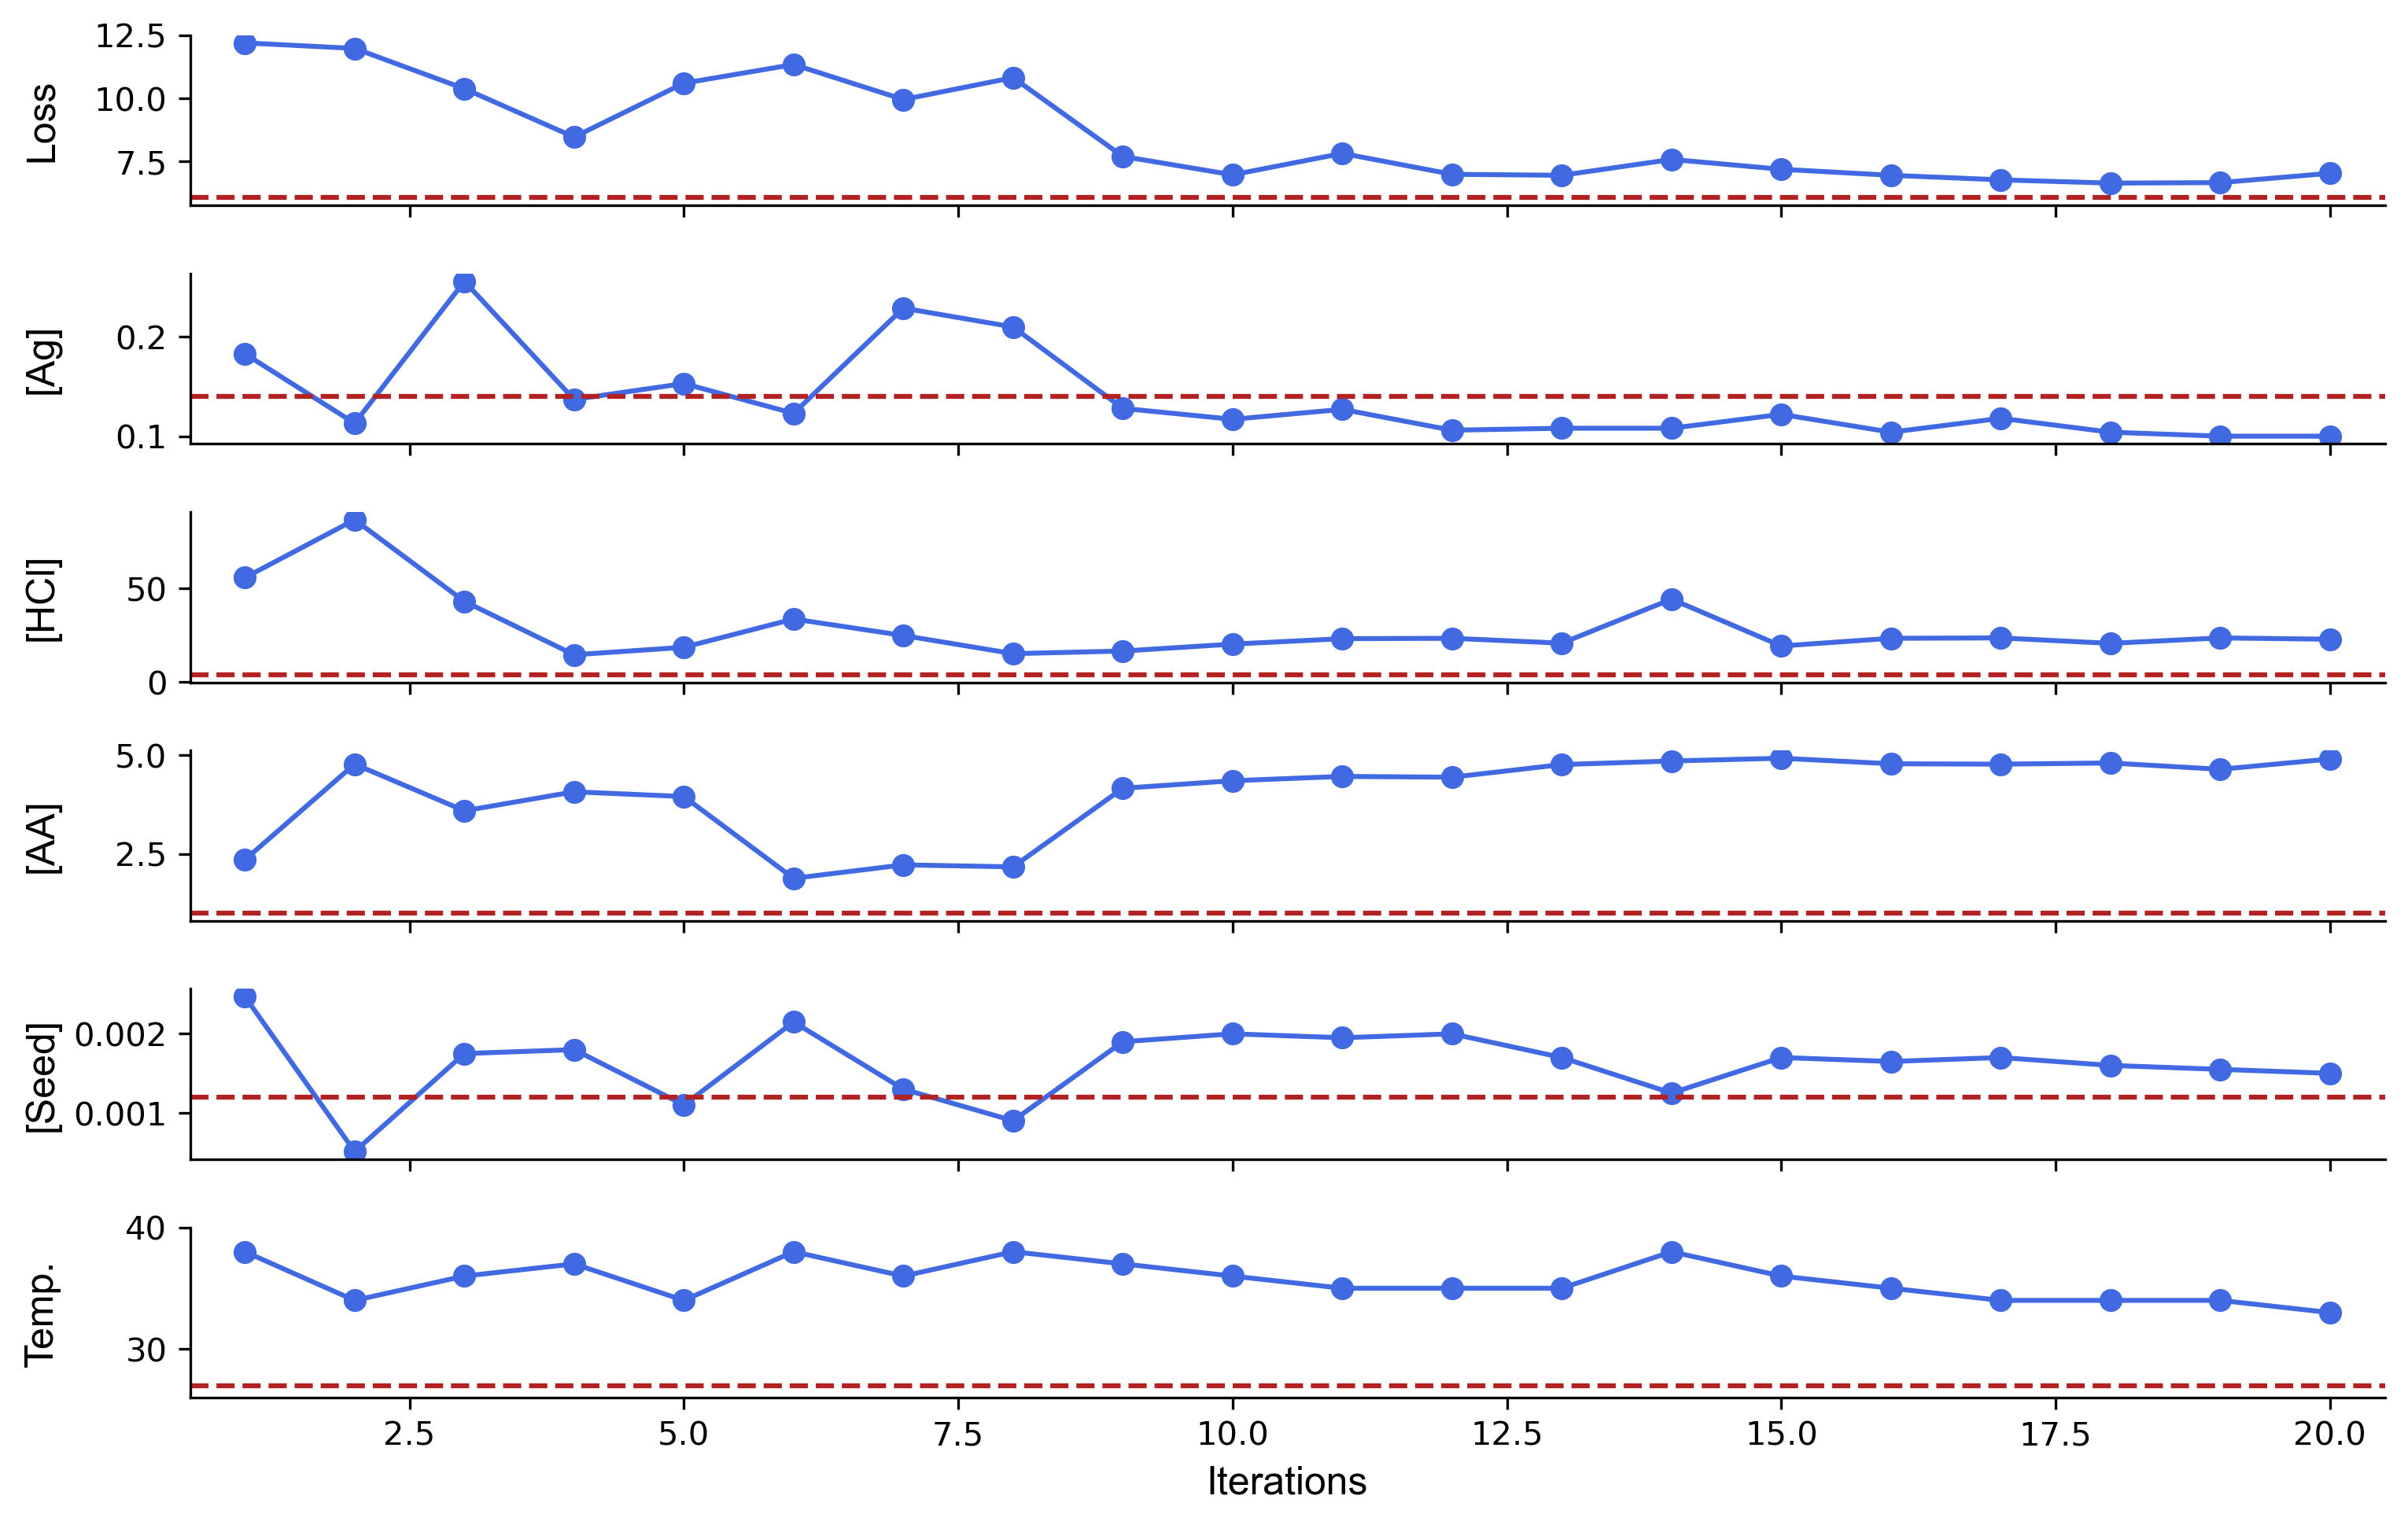

In [88]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import glob
import os





# Load reference CSV file
ref_df = pd.read_csv(os.path.join(DATA_UV_DIR_PATH_ABS, 'rev-obj.csv'), header=None)

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH_ABS

# Get a list of all CSV files in the folder
csv_files = natsorted(glob.glob(os.path.join(folder_path, '*.csv')))

# Define the reference CSV file name
ref_file_name = 'rev-obj.csv'

# Create a figure with 1 row and 2 columns of subplots, 12 inches long and 7.5 inches wide, 300 dpi
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), dpi=300)

# Initialize variables to keep track of subplot indices
col_index = 0

# Initialize empty list to store Abs at lambda max. / Abs at 400nm
abs_ratios = []
num = 1

# Define the experiment numbers you want to plot
experiments_to_plot = [1, 18]

# Loop through all CSV files in the folder
for csv_file in csv_files:
    
    # Check if the current file is not the reference file and the experiment number is in the list to plot
    if os.path.basename(csv_file) != ref_file_name and num in experiments_to_plot:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, header=None)

        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())
        
        # Plot the normalized second column of the current file against the reference file in the current subplot
        axs[col_index].fill_between(df.iloc[:, 0], 0, df.iloc[:, 1], color='firebrick', label='Exp. '+str(num), alpha=0.5)
        axs[col_index].fill_between(ref_df[0], ref_df[1], 0, color='royalblue', label='Objective', alpha=0.5)
        
        axs[col_index].set_xlabel(r'Wavelength (nm)', fontsize='large')
        axs[col_index].set_ylabel(r'Norm. Extinction', fontsize='large')
        axs[col_index].legend(loc='upper left', frameon=False, fontsize='medium')
        axs[col_index].set_xlim(400, 1100)
        axs[col_index].set_ylim([0, 1.3])
        axs[col_index].spines[['right', 'top']].set_visible(False)

        fig.tight_layout()

        # Increment the column index
        col_index += 1

        # Break the loop when both experiments are plotted
        if col_index == 2:
            break

    # Increment the experiment number
    num += 1

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(DATA_UV_DIR_PATH+'iterations.csv')

# Create a figure with three subplots, each having the same width as the upper plots
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(12, 7.5), dpi=300)

# Plot the first column against the second column in the first subplot
axs[0].plot(df['Iteration #'], df['loss parameter'], color='royalblue')
axs[0].scatter(df['Iteration #'], df['loss parameter'], color='royalblue')
axs[0].set_ylabel('Loss', fontsize='large', font='Arial')
axs[0].axhline(y=6.05, color='firebrick', linestyle='--')
axs[0].spines[['right', 'top']].set_visible(False)

# Plot the first column against the third column in the second subplot
axs[1].plot(df['Iteration #'], df['conc(ag)'], color='royalblue')
axs[1].scatter(df['Iteration #'], df['conc(ag)'], color='royalblue')
axs[1].set_ylabel('[Ag]', fontsize='large', font='Arial')
axs[1].axhline(y=0.14, color='firebrick', linestyle='--')
axs[1].spines[['right', 'top']].set_visible(False)

# Plot the first column against the fourth column in the third subplot
axs[2].plot(df['Iteration #'], df['conc(hcl)'], color='royalblue')
axs[2].scatter(df['Iteration #'], df['conc(hcl)'], color='royalblue')
axs[2].set_ylabel('[HCl]', fontsize='large', font='Arial')
axs[2].axhline(y=4, color='firebrick', linestyle='--')
axs[2].spines[['right', 'top']].set_visible(False)

# Plot the first column against the fourth column in the fourth subplot
axs[3].plot(df['Iteration #'], df['conc(aa)'], color='royalblue')
axs[3].scatter(df['Iteration #'], df['conc(aa)'], color='royalblue')
axs[3].set_ylabel('[AA]', fontsize='large', font='Arial')
axs[3].axhline(y=1, color='firebrick', linestyle='--')
axs[3].spines[['right', 'top']].set_visible(False)

# Plot the first column against the fifth column in the fourth subplot
axs[4].plot(df['Iteration #'], df['conc(seed)'], color='royalblue')
axs[4].scatter(df['Iteration #'], df['conc(seed)'], color='royalblue')
axs[4].set_ylabel('[Seed]', fontsize='large', font='Arial')
# axs[4].set_ylim(0, 0.004)
axs[4].axhline(y=0.0012, color='firebrick', linestyle='--')
axs[4].spines[['right', 'top']].set_visible(False)

# Plot the first column against the sixth column in the fourth subplot
axs[5].plot(df['Iteration #'], df['temperature [Anish]'], color='royalblue')
axs[5].scatter(df['Iteration #'], df['temperature [Anish]'], color='royalblue')
axs[5].set_ylabel('Temp.', fontsize='large', font='Arial')
axs[5].axhline(y=27, color='firebrick', linestyle='--')
axs[5].set_xlabel('Iterations', fontsize='large', font='Arial')
axs[5].set_xlim(0.5, 20.5)
axs[5].set_ylim(26, 40)
axs[5].spines[['right', 'top']].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
fig.align_ylabels()

# Show the plot
plt.show()
